In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

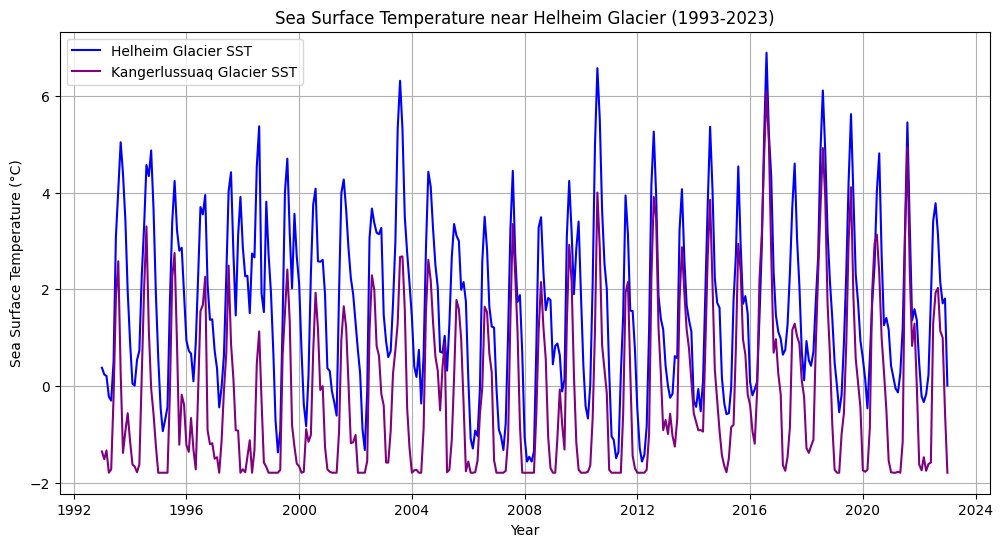

In [7]:
# Define the file path
file_path = "data/sst.mnmean.nc"
dataset = xr.open_dataset(file_path)

# sel variables
sst = dataset['sst']  # Access the 'sst' variable directly as a DataArray

# Select the nearest grid point to the specified coordinates
lat1 = 66.3  # Approximate latitude for Helheim Glacier
lon1 = -38.2 + 360  # Convert W longitude to 0-360 scale
lat2 = 68.6  # Kangerlussuaq Glacier
lon2 = -33.0 + 360  # Convert W longitude to 0-360 scale
sst_helheim = sst.sel(lat=lat1, lon=lon1, method='nearest')  # Use the nearest flag
sst_kanger = sst.sel(lat=lat2, lon=lon2, method='nearest')  # Use the nearest flag

# time range
start_date = '1993-01-01'
end_date = '2023-01-01'
sst_helheim_filtered = sst_helheim.sel(time=slice(start_date, end_date))
sst_kanger_filtered = sst_kanger.sel(time=slice(start_date, end_date))

# Debug: Check raw data
'''
print("Raw SST data for the selected point:")
for timestamp in sst_time_filtered['time']:
    data_at_time = sst_time_filtered.sel(time=timestamp)
    print(f"Date: {timestamp.values}")
    print(data_at_time.values)
    print("-" * 40)
'''

# Convert to NumPy
sst_mean_values = sst_helheim_filtered.values  # Extract SST values
time_index = pd.to_datetime(sst_helheim_filtered['time'].values)  # Convert time to pandas datetime

# Plots

plt.figure(figsize=(12, 6))
plt.plot(time_index, sst_helheim_filtered.values, label='Helheim Glacier SST', color='blue')
plt.plot(time_index, sst_kanger_filtered.values, label='Kangerlussuaq Glacier SST', color='purple')
plt.xlabel('Year')
plt.ylabel('Sea Surface Temperature (°C)')
plt.title('Sea Surface Temperature near Helheim Glacier (1993-2023)')
plt.legend()
plt.grid(True)
#plt.show()
plt.savefig('figures/SST-EastGreenland_1993-2023.png', bbox_inches='tight')


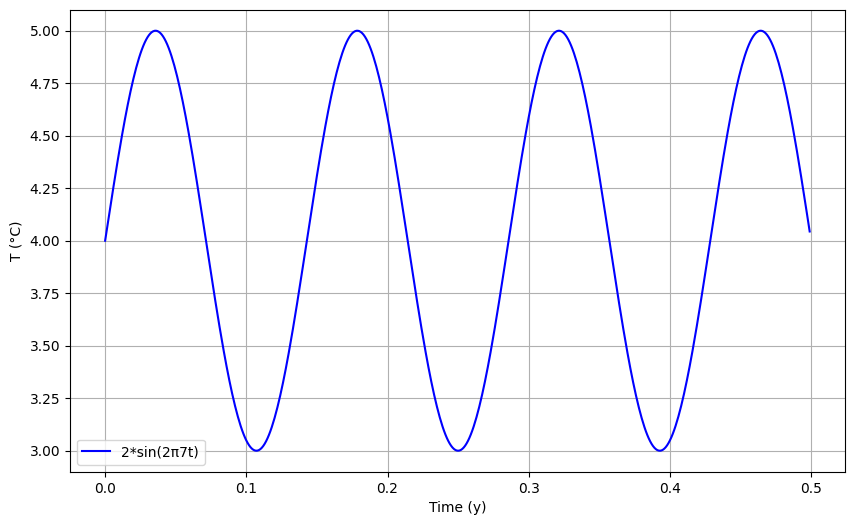

In [18]:
# Sine model
frequency = 7  # Frequency in Hz
amplitude = 2  # Amplitude of the wave
time_end = .5   # Duration in seconds
sampling_rate = 1000  # Samples per second

# Generate the time array
t = np.linspace(0, time_end, int(sampling_rate * time_end), endpoint=False)

# Calculate the sine wave
y = amplitude * 2+np.sin(2 * np.pi * frequency * t)

# Plot the sine wave
plt.figure(figsize=(10, 6))
plt.plot(t, y, label=f'{amplitude}*sin(2π{frequency}t)', color='blue')
plt.xlabel('Time (y)')
plt.ylabel('T (°C)')
#plt.title('Sine Wave')
plt.legend()
plt.grid(True)
plt.show()